# Importing tools

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# loading and splitting the description

In [2]:
cancer=load_breast_cancer()
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test =train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)

##  Neural Network model



**Here is our model**:
<img src="img/neuron-diagram.jpg" style="width:600px;height:300px;">
<img src="img/nn4.png" style="width:800px;height:400px;" >


In [3]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=0).fit(X_train,y_train)

print("Accuracy on the training subset: {:.3f}" .format(mlp.score(X_train,y_train)))
print("Accuracy on the testing subset: {:.3f}" .format(mlp.score(X_test,y_test)))

Accuracy on the training subset: 0.866
Accuracy on the testing subset: 0.846


* here the accuracy on both trainig and testing is not so godd compared to other classifiers 
* this may be due to the scaling of data - the features of the data are not of the same scale 
* ie it should have 0 mean and unit/1 as variance

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on the training subset: {:.3f}" .format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on the testing subset: {:.3f}" .format(mlp.score(X_test_scaled,y_test)))

Accuracy on the training subset: 0.993
Accuracy on the testing subset: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


* here it raises a warning because the default value of max_iter=200 & the maximum iterations are not enough for optimization to reach convergence so we need to create a new one where the max_iter = 1000

In [14]:
mlp =MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on the training subset: {:.3f}" .format(mlp.score(X_train_scaled,y_train)))
print("Accuracy on the testing subset: {:.3f}" .format(mlp.score(X_test_scaled,y_test)))

Accuracy on the training subset: 0.995
Accuracy on the testing subset: 0.965


* there is still some gap b/w the training and testing set so we will now reduce that by Regularization

In [15]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

* the default activation function is Relu
* by default the value of alpha is 0.0001
* the default hidden layers =100

In [18]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.991
Accuracy on the test subset: 0.972


* now due to alpha parameter the gap has been reduced

#### we will now see the weights of our model

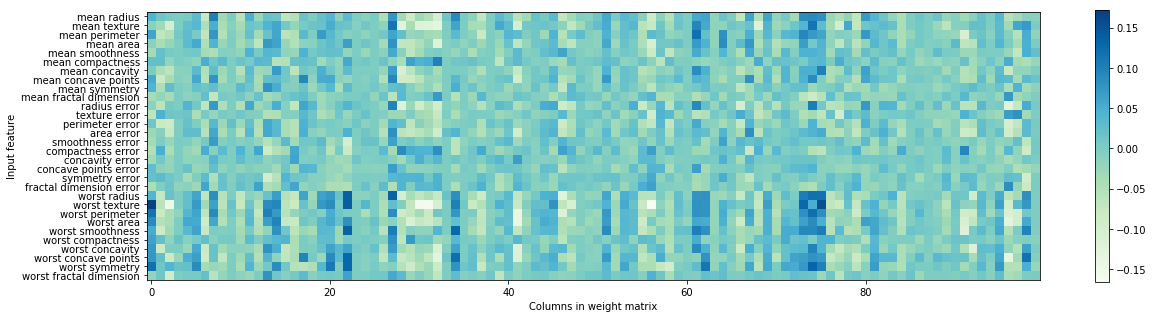

In [26]:
n_features=cancer.data.shape[1]
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(n_features), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

* features with less weight means they carry less importance

#### Inference
* range from smoothness error to fractal dimension error they don't carry much weight throughout
* mean compactness ,texture error,etc also are of less importance

#### Stronger points:
* can be used efficiently on large datasets
* can build very complex models
* many parameters for tuning
* flexibility and rapid prototyping etc.

#### Weaker points:
* many parameters for tuning
* some solvers are scale sensitive
* data may need to be pre-processedetc.

#### Alternatives:
* theano
* tensorflow
* keras
* lasagnaetc.